## EPi phase correction using three navigators
###### Author: Zimu Huo
###### Date: 07.2022


Simple and elegant technique 

-------------------------------------------------------------------------
References

    [1] 
    Author:  O. Heid
    Title: Robust EPI Phase Correction
    Link: https://www.researchgate.net/publication/308960869_Robust_EPI_Phase_Correction

In [1]:
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from util.twix import *
from util.fft import *
from util.epi import *
import util.simulator as simulate

In [2]:
file_sms = "../lib/resource/XA31A/meas_MID00310_FID03272_zimu_B0_DF75_Mono_GRAPPA0_EPI.dat"
file = readtwix(file_sms)
FIGSIZE = (10,6)
epiorder = 9

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 0 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/215 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/2 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   SB_EPI_NAV
1   DATA


In [3]:
pha = file[0]['readouts']
phaflag=file[0]['flags']
data = file[1]['readouts']
dataflag = file[1]['flags']
print(data.shape)

(48, 128, 30)


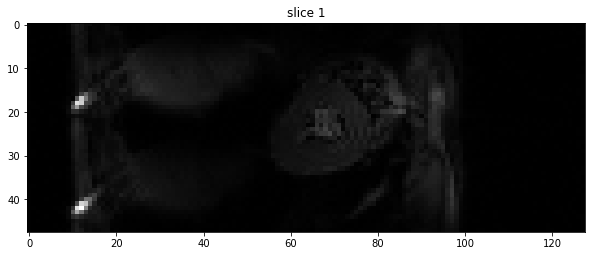

In [4]:
plt.figure(figsize = FIGSIZE)
plt.title("slice 1")
plt.imshow(np.abs(rsos(ifft2c(data))), cmap ="gray")

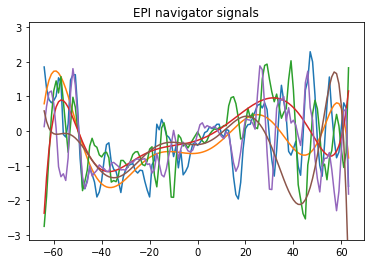

In [5]:
recon = epi_phasecorrection_percoil(data, pha, dataflag, phaflag, order = epiorder, v = 1)

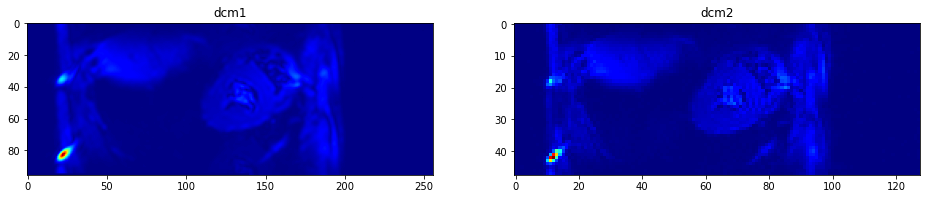

In [6]:
import pydicom as dicom
image_path = '../lib/resource/XA31A/IM-0005-0001.dcm'
ds = dicom.dcmread(image_path)
truth = ds.pixel_array
plt.figure(figsize =(16,12))
plt.subplot(1,2,1)
plt.title("dcm1")
plt.imshow(np.flip(truth[::-1],1), cmap ="jet")
plt.subplot(1,2,2)
plt.title("dcm2")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="jet")

/var/folders/5d/6p36mvb505x5j7b_90jtxdsr0000gn/T/ipykernel_17155/615504967.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.flip(truth[::-1],1)), cmap ="jet")


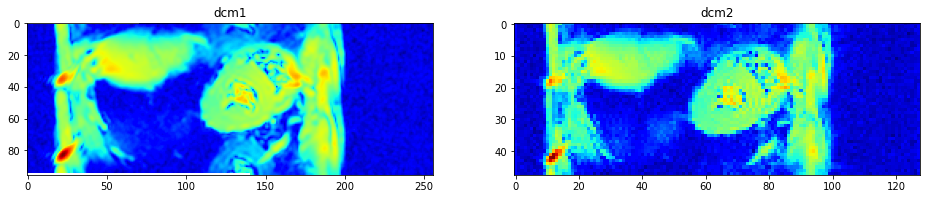

In [7]:
import pydicom as dicom
image_path = '../lib/resource/XA31A/IM-0005-0001.dcm'
ds = dicom.dcmread(image_path)
truth = ds.pixel_array
plt.figure(figsize =(16,12))
plt.subplot(1,2,1)
plt.title("dcm1")
plt.imshow(np.log(np.flip(truth[::-1],1)), cmap ="jet")
plt.subplot(1,2,2)
plt.title("dcm2")
plt.imshow(np.log(np.abs(rsos(ifft2c(recon)))), cmap ="jet")

In [17]:
from util.entropy import * 
recon2 = epi_phasecorrection_entropy(data)

100%|█████████████████████████████████████████████| 1/1 [00:12<00:00, 12.34s/it]


/var/folders/5d/6p36mvb505x5j7b_90jtxdsr0000gn/T/ipykernel_17155/4011489448.py:12: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.flip(truth[::-1],1))[2:-2,2:-2], cmap ="gray")


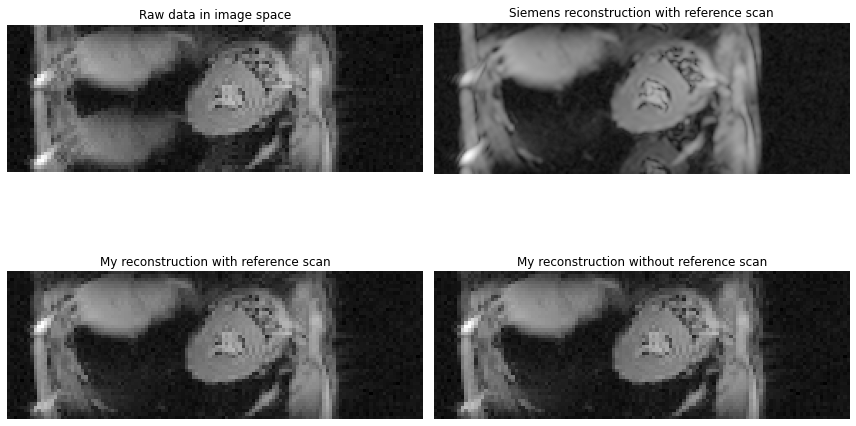

In [20]:
import pydicom as dicom
image_path = '../lib/resource/XA31A/IM-0005-0001.dcm'
ds = dicom.dcmread(image_path)
truth = ds.pixel_array
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
plt.title("Raw data in image space")
plt.imshow(np.log(np.abs(rsos(ifft2c(data))))[2:-2,2:-2], cmap ="gray")
plt.axis('off')
plt.subplot(2,2,2)
plt.title("Siemens reconstruction with reference scan")
plt.imshow(np.log(np.flip(truth[::-1],1))[2:-2,2:-2], cmap ="gray")
plt.axis('off')
plt.subplot(2,2,3)
plt.title("My reconstruction with reference scan")
plt.imshow(np.log(np.abs(rsos(ifft2c(recon))))[2:-2,2:-2], cmap ="gray")
plt.axis('off')
plt.subplot(2,2,4)
plt.title("My reconstruction without reference scan")
plt.imshow(np.log(np.abs(rsos(ifft2c(recon2))))[2:-2,2:-2], cmap ="gray")